In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [45]:
dataset_path = "./Housing/housing.data"

column_names = [
  'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM',
  'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT',
  'MEDV'
]

raw_dataset = pd.read_csv(dataset_path, names=column_names,
                      na_values = "?", comment='\t',
                      sep=" ", skipinitialspace=True)

data = raw_dataset.copy()
data.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273.0,21.0,396.90,7.88,11.9


In [48]:
corr_matrix = data.corr()
medv_corr = corr_matrix["MEDV"].drop("MEDV").sort_values(ascending=False, key=lambda x: abs(x))
print("\nCorrelaciones con medv:")
print(medv_corr)


Correlaciones con medv:
LSTAT     -0.737663
RM         0.695360
PTRATIO   -0.507787
INDUS     -0.483725
TAX       -0.468536
NOX       -0.427321
CRIM      -0.388305
RAD       -0.381626
AGE       -0.376955
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
Name: MEDV, dtype: float64


In [67]:
target_column = ['MEDV']

In [64]:
selected_features = ['LSTAT', 'RM', 'PTRATIO', 'INDUS', 'TAX', 'NOX']


In [68]:
X = data[selected_features]
y = data[target_column]


In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [70]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [71]:
def build_model():
    model = keras.Sequential([
        layers.Dense(64, activation='relu', input_shape=[X_train_scaled.shape[1]]),
        layers.Dense(64, activation='relu'),
        layers.Dense(1)
    ])
    model.compile(
        loss='mse',
        optimizer=keras.optimizers.Adam(0.001),
        metrics=['mae', 'mse']
    )
    return model

model = build_model()


/workspace/UPSLP-Chatbot/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [72]:
history = model.fit(
    X_train_scaled, y_train,
    validation_split=0.2,
    epochs=100,
    verbose=1
)


Epoch 1/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 574.6757 - mae: 22.1570 - mse: 574.6757 - val_loss: 528.6591 - val_mae: 21.4299 - val_mse: 528.6591
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 573.9091 - mae: 21.9609 - mse: 573.9091 - val_loss: 493.6808 - val_mae: 20.6103 - val_mse: 493.6808
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 556.1807 - mae: 21.5745 - mse: 556.1807 - val_loss: 450.1304 - val_mae: 19.5487 - val_mse: 450.1304
Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 479.2424 - mae: 19.8085 - mse: 479.2424 - val_loss: 393.2406 - val_mae: 18.0785 - val_mse: 393.2406
Epoch 5/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 406.1770 - mae: 18.1235 - mse: 406.1770 - val_loss: 320.7166 - val_mae: 16.1227 - val_mse: 320.7166
Epoch 6/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 309.4708 - mae: 15.2851 - mse: 309.4708 - val_loss: 235.9155 - val_mae: 13.5685 - val_mse: 235.9155
Epoch 7/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 

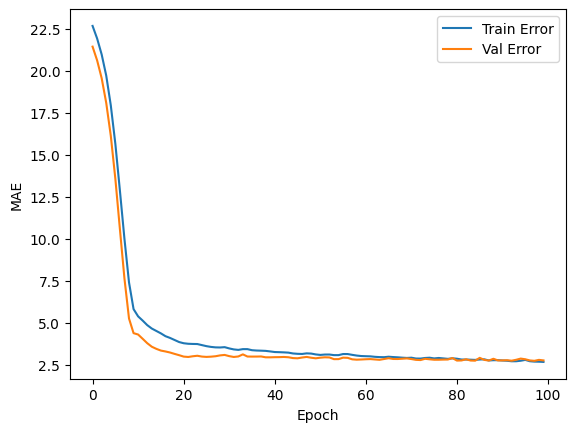

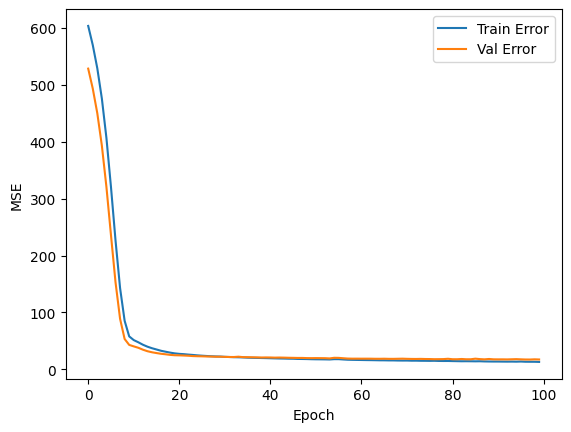

In [73]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('MAE')
    plt.plot(hist['epoch'], hist['mae'], label='Train Error')
    plt.plot(hist['epoch'], hist['val_mae'], label='Val Error')
    plt.legend()

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('MSE')
    plt.plot(hist['epoch'], hist['mse'], label='Train Error')
    plt.plot(hist['epoch'], hist['val_mse'], label='Val Error')
    plt.legend()
    plt.show()

plot_history(history)


In [77]:
loss, mae, mse = model.evaluate(X_test_scaled, y_test, verbose=2)
print(f'\nEvaluacion del modelo — MAE: {mae:.2f}, MSE: {mse:.2f}')


4/4 - 0s - 8ms/step - loss: 15.0095 - mae: 2.5429 - mse: 15.0095

Evaluacion del modelo — MAE: 2.54, MSE: 15.01


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


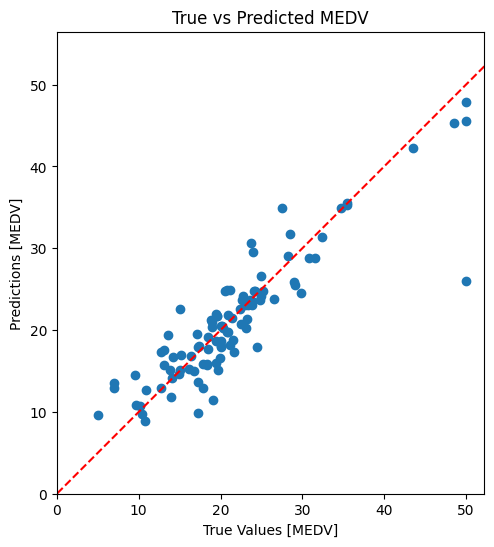

In [79]:
test_predictions = model.predict(X_test_scaled).flatten()

plt.figure(figsize=(6, 6))
plt.scatter(y_test, test_predictions)
plt.xlabel('True Values [MEDV]')
plt.ylabel('Predictions [MEDV]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0, plt.xlim()[1]])
plt.ylim([0, plt.ylim()[1]])
plt.plot([-100, 100], [-100, 100], color='red', linestyle='--') 
plt.title("True vs Predicted MEDV")
plt.show()


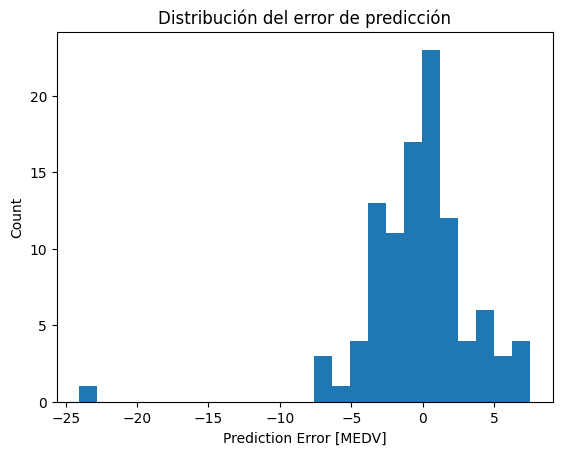

In [80]:
error = test_predictions - y_test.values.flatten()

plt.figure()
plt.hist(error, bins=25)
plt.xlabel("Prediction Error [MEDV]")
plt.ylabel("Count")
plt.title("Distribución del error de predicción")
plt.show()
